### Acadgild Assignment 24.1

### Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard),and Fare to predict whether a passenger survived.


#### Import Modules and Load Data

In [1]:

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split -- note deprecation warning below
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display
url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url)
titanic.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

### Deprecation warning
this assignment used:
```python
from sklearn.cross_validation import train_test_split
```

resulting in the following error:
```python
C:\Users\Patrick\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
```

proper call is now:
```python
from sklearn.model_selection import train_test_split
```


### Let's take a look at the data 🤠

In [2]:
titanic.shape 

(891, 12)

In [3]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
titanic.index

RangeIndex(start=0, stop=891, step=1)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
display(titanic.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Check for NULL values

In [9]:
titanic.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Drop the NULLs

In [10]:
titanic = titanic.dropna()

#### Verify NULL Drop

In [11]:
titanic.isnull().sum(axis=0)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

NameError: name 'save_fig' is not defined

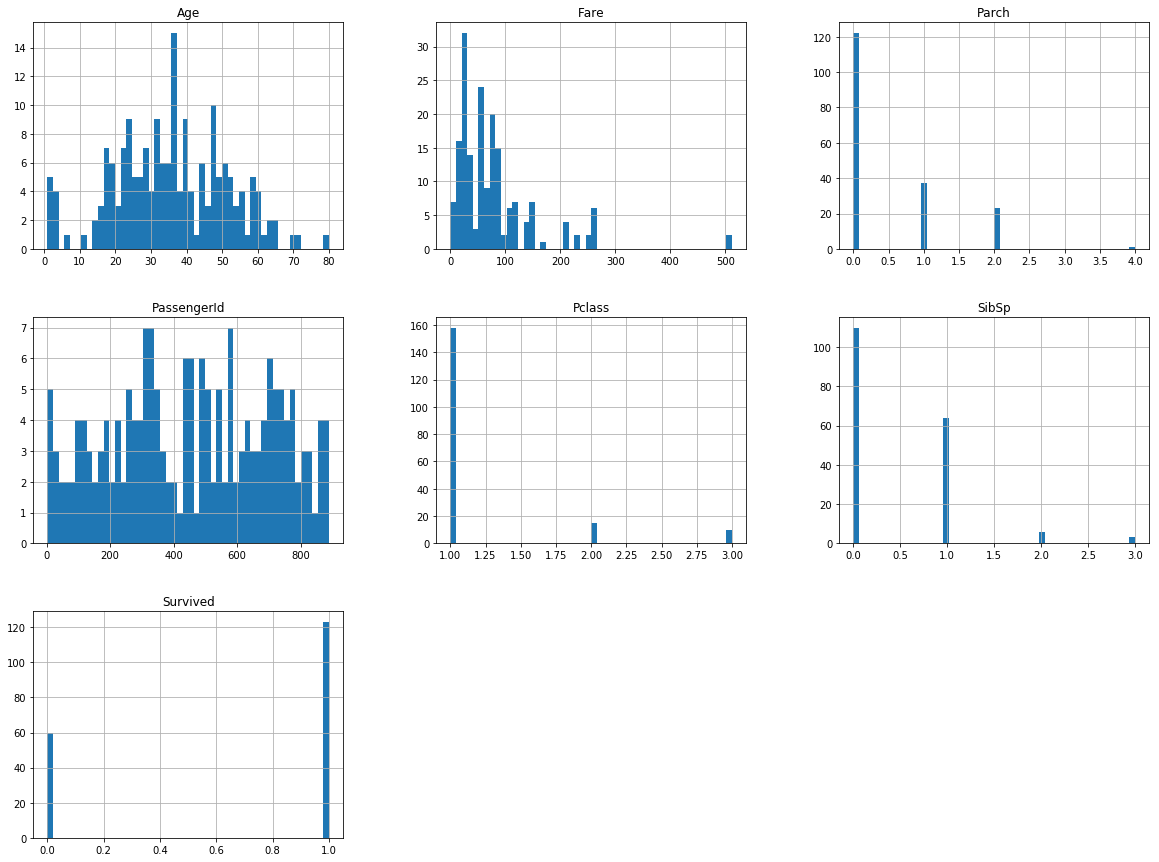

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
titanic.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [12]:
titanic['Survived'] = titanic['Survived'].astype('int')
titanic.corr(method='pearson',min_periods=1).transpose().sort_values('Survived', ascending=False)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,0.148495,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
PassengerId,1.000000,0.148495,-0.089136,0.030933,-0.083488,-0.051454,0.029740
Fare,0.029740,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000
SibSp,-0.083488,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,-0.051454,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Pclass,-0.089136,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,0.030933,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424


In [13]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


#### D'oh... forgot to convert string to float... let's use the dummies function for that

In [14]:
titanic_gender = titanic.join(pd.get_dummies(titanic.Sex))
#titanic_gender = pd.get_dummies(titanic, columns = ['Sex'])

In [15]:
titanic_gender.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,0


#### Let's try a quick pearson again, just for fun :)

In [16]:
titanic_gender['Survived'] = titanic_gender['Survived'].astype('int')
titanic_gender.corr(method='pearson',min_periods=1).transpose().sort_values('Survived', ascending=False)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
Survived,0.148495,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241,0.532418,-0.532418
female,0.025205,0.532418,0.046181,-0.184969,0.104291,0.089581,0.130433,1.000000,-1.000000
PassengerId,1.000000,0.148495,-0.089136,0.030933,-0.083488,-0.051454,0.029740,0.025205,-0.025205
Fare,0.029740,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000,0.130433,-0.130433
SibSp,-0.083488,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433,0.104291,-0.104291
Parch,-0.051454,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740,0.089581,-0.089581
Pclass,-0.089136,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235,0.046181,-0.046181
Age,0.030933,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424,-0.184969,0.184969
male,-0.025205,-0.532418,-0.046181,0.184969,-0.104291,-0.089581,-0.130433,-1.000000,1.000000


In [17]:
y = titanic_gender['Survived']
X = titanic_gender[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'female']]

#### Split data randomly into 70% training and 30% test


In [18]:

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [20]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)

In [21]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 11
Accuracy: 0.80


#### Perform GridSerach on the parameters and use the best estimator for scoring on the valiation set.

In [22]:
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth': range(2, 5),   
 'min_samples_split': [2, 3, 5],
 'min_samples_leaf': [1, 2, 3]
}

grid_result = GridSearchCV(dtree, param_grid=param_test1, cv=10, n_jobs=-1, verbose=1)
grid_result.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    5.6s finished


Best: 0.757812 using {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [23]:
print("Accuracy for test data set:\n")
predicted = grid_result.predict(X_test)
print (format(metrics.accuracy_score(y_test, predicted) * 100,'.2f'), '%.')


Accuracy for test data set:

80.00 %.


#### Plot the tree with pydotplus / graphviz


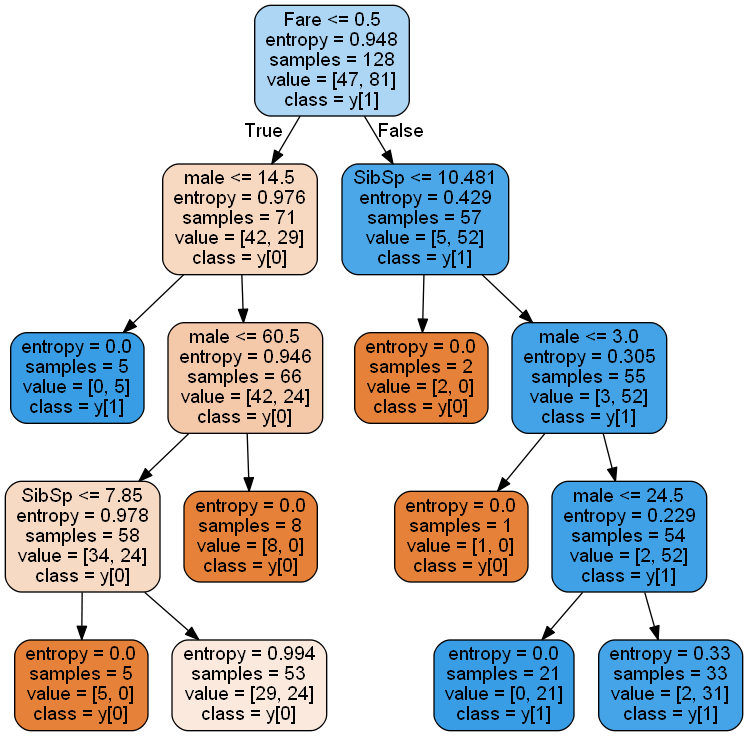

In [24]:
import pydotplus
from sklearn import tree

dot_data = tree.export_graphviz(grid_result.best_estimator_, out_file=None, filled=True, rounded=True,
                                feature_names=['Pclass', 'male', 'female', 'Age', 'SibSp', 'Parch', 'Fare'],
                                class_names=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

In [25]:
#### Let us predict the chance of survival of a 3-year-old boy traveling with parents in the 2nd class

In [28]:
#['Pclass', 'male', 'female', 'Age', 'SibSp', 'Parch', 'Fare']
#probability = model.predict_proba(X)[:,1]
#grid_result.predict_proba(np.array([[2, 1,0, 3, 0, 2, 0.0]]))[:,1]
grid_result.predict_proba(np.array([[2, 1, 0, 3, 0, 2, 0.0]]))

array([[0., 1.]])